In [2]:
# The goal is to use the "Twitter dataset for arabic sentiment analysis" to train a model to predict whether an arabic tweet has a postive or negative sentiment
# As it is a binary classification problem (positive sentiment: 1, negative sentiment: 0), we will create a logistic regression model
# We need to use Tf-idf vectorizer to calculate terms frequency and idf of terms (higher rarity corresponds to higher idf)

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns

import os

In [4]:
# Read the dataset and encode it using utf-8
# build a function that lists the txt files of a folder in a single list and apply it to postive and negative tweets

def read_texts(folder):
    texts=[]
    for file in os.listdir(folder):
        if file.endswith('.txt'):
            file_path = os.path.join(folder, file)
            with open(file_path, 'r', encoding = 'utf-8', errors= 'replace') as f:
                text = f.read().strip()
                texts.append(text)   
    return texts                
positive_folder = 'Twitter/Positive'
negative_folder = 'Twitter/Negative'
positive_texts = read_texts(positive_folder)
negative_texts = read_texts(negative_folder)
df = pd.DataFrame(positive_texts + negative_texts, columns=['tweet'])
df['label'] = [1] * len(positive_texts) + [0] * len(negative_texts)
df.head(df.shape[0])

,tweet,label
0,﻿حقا,1
1,صح جدا,1
2,﻿اه و النعمة,1
3,كلامك جميل ورائع,1
4,﻿و خير الكلام ما قل و دل,1
...,...,...
1995,البرنامج فاشل جدا,0
1996,ضيعت 7 دقايق من عمري بمشاهدة ازنخ و اتفه شخص ب...,0
1997,﻿ بكتب ع اوراق الشجر يقول موهبتي وانا صغير الل...,0
1998,هذا اللي بالنص من لجنة الحكم مفكر نفسو وديع ال...,0


In [5]:
# Normmalize arabic text to standardize the input
import re

def normalize_arabic(text):
    fatha   = 'َ'   # fatha/ short vowel "a"
    damma   = 'ُ'   # damma/ short vowel "u"
    kasra   = 'ِ'   # kasra/ short vowel "i"
    tanwin_fatha = 'ً'
    tanwin_damma = 'ٌ'
    tanwin_kasra = 'ٍ'
    sukun   = 'ْ'   # absence of vowel
    shadda  = 'ّ'   # consonant doubling
    tatweel = 'ـ'   # elongation mark

    # Remove all harakat and tatweel
    text = re.sub(f"[{fatha}{damma}{kasra}{tanwin_fatha}{tanwin_damma}{tanwin_kasra}{sukun}{shadda}{tatweel}]", '', text)

    # Normalize Alef variants
    text = re.sub(r'[إأآا]', 'ا', text)

    # Remove non-Arabic characters and extra spaces 
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply normalization
df['cleaned_tweet'] = df['tweet'].apply(normalize_arabic)
df[['tweet', 'cleaned_tweet']].head(100)


,tweet,cleaned_tweet
0,﻿حقا,حقا
1,صح جدا,صح جدا
2,﻿اه و النعمة,اه و النعمة
3,كلامك جميل ورائع,كلامك جميل ورائع
4,﻿و خير الكلام ما قل و دل,و خير الكلام ما قل و دل
...,...,...
95,صباح الفل,صباح الفل
96,﻿اللهم اغفر له و وسع لك رحمتك له و اصلح له ذريته,اللهم اغفر له و وسع لك رحمتك له و اصلح له ذريته
97,﻿صباح الرحمة و البركات إن شاء الله,صباح الرحمة و البركات ان شاء الله
98,﻿لست الأفضل و لكن لي أسلوبي سأظل دائماً اتقبل ...,لست الافضل و لكن لي اسلوبي ساظل دائما اتقبل را...


In [6]:
# Vectorize the arabic text
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['cleaned_tweet'])
y = df['label']

In [7]:
# Split the dataset and train the model using Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Accuracy: 0.8375

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       400
           1       0.91      0.75      0.82       400

    accuracy                           0.84       800
   macro avg       0.85      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



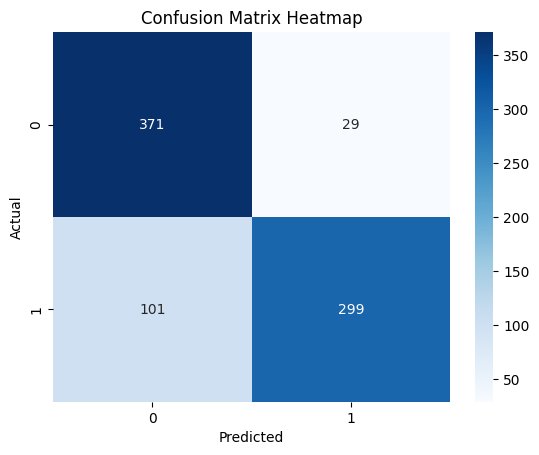

In [8]:
# Evaluate the model

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [9]:
test_tweets = [
    "الجو اليوم جميل والمزاج أروع!",
    "الرحلة كانت منظمة وكل شيء سار بسلاسة.",
    "شكراً للدعم الفني، تجاوبهم سريع ومحترف.",
    "الطعام لذيذ جدًا والخدمة ممتازة.",
    "أحب التصميم الجديد للتطبيق، أنيق وسهل الاستخدام.",
    "أفضل تجربة تسوق أونلاين حتى الآن.",
    "الحمد لله النتيجة طلعت مثل ما تمنيت.",
    "كل شيء كان مثالي من البداية للنهاية.",
    "تعامل راقٍ واحترام في كل التفاصيل.",
    "أنصح الجميع بهذا المكان الرائع.",
    "خدمة العملاء سيئة ولا يردون على الرسائل.",
    "انصدمت من جودة المنتج، سيئ جدًا.",
    "للأسف التوصيل تأخر أسبوع كامل.",
    "الموقع يعلق كل مرة أحاول أستخدمه.",
    "الموظف كان فظًا وغير متعاون إطلاقًا.",
    "تجربة مخيبة، ما أنصح بها أبدًا.",
    "الأسعار مبالغ فيها مقارنة بالجودة.",
    "البرنامج مليء بالأخطاء ولا يعمل جيدًا.",
    "ضاعت بياناتي بعد التحديث الجديد!",
    "التطبيق ثقيل جدًا ويغلق فجأة."
]



X_test_new = vectorizer.transform(test_tweets)
preds = model.predict(X_test_new)

for t, p in zip(test_tweets, preds):
    print(f"{t} → {'إيجابي' if p==1 else 'سلبي'}")



الجو اليوم جميل والمزاج أروع! → إيجابي
الرحلة كانت منظمة وكل شيء سار بسلاسة. → إيجابي
شكراً للدعم الفني، تجاوبهم سريع ومحترف. → إيجابي
الطعام لذيذ جدًا والخدمة ممتازة. → إيجابي
أحب التصميم الجديد للتطبيق، أنيق وسهل الاستخدام. → سلبي
أفضل تجربة تسوق أونلاين حتى الآن. → سلبي
الحمد لله النتيجة طلعت مثل ما تمنيت. → إيجابي
كل شيء كان مثالي من البداية للنهاية. → إيجابي
تعامل راقٍ واحترام في كل التفاصيل. → إيجابي
أنصح الجميع بهذا المكان الرائع. → سلبي
خدمة العملاء سيئة ولا يردون على الرسائل. → سلبي
انصدمت من جودة المنتج، سيئ جدًا. → إيجابي
للأسف التوصيل تأخر أسبوع كامل. → سلبي
الموقع يعلق كل مرة أحاول أستخدمه. → إيجابي
الموظف كان فظًا وغير متعاون إطلاقًا. → سلبي
تجربة مخيبة، ما أنصح بها أبدًا. → سلبي
الأسعار مبالغ فيها مقارنة بالجودة. → سلبي
البرنامج مليء بالأخطاء ولا يعمل جيدًا. → سلبي
ضاعت بياناتي بعد التحديث الجديد! → سلبي
التطبيق ثقيل جدًا ويغلق فجأة. → سلبي
